In [1]:
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType

import matplotlib.pyplot as plt
import numpy as np

## Original Perfect Foresight Example

In [2]:
PFexample = PerfForesightConsumerType()
PFexample.cycles = 0
PFexample.solve()

In [3]:
SimulationParams = {
    "AgentCount": 10000,  # Number of agents of this type
    "T_sim": 120,  # Number of periods to simulate
    "aNrmInitMean": -6.0,  # Mean of log initial assets
    "aNrmInitStd": 1.0,  # Standard deviation of log initial assets
    "pLvlInitMean": 0.0,  # Mean of log initial permanent income
    "pLvlInitStd": 0.0,  # Standard deviation of log initial permanent income
    "PermGroFacAgg": 1.0,  # Aggregate permanent income growth factor
    "T_age": None,  # Age after which simulated agents are automatically killed
}

PFexample.assign_parameters(**SimulationParams)

In [4]:
PFexample.track_vars = ["mNrm"]
PFexample.initialize_sim()
PFexample.simulate()

{'mNrm': array([[  1.00095989,   1.00282396,   1.00111932, ...,   1.00185921,
           1.00044451,   1.00448108],
        [ -0.30491013,  -0.30309332,  -0.30475474, ...,  -0.30403362,
          -0.30541244,  -0.30147822],
        [ -1.57766816,  -1.57589742,  -1.57751671, ...,  -1.57681387,
          -1.57815773,  -1.57432327],
        ...,
        [-21.97118426,  -9.62717581, -36.59971086, ...,   1.00376132,
          -2.81712554, -46.01045686],
        [-22.69456637, -10.66355594,   1.00072865, ...,  -0.30217974,
          -4.02618315, -46.12429267],
        [-23.39960622, -11.67365734,  -0.30513551, ...,  -1.575007  ,
          -5.20458357, -46.23524203]])}

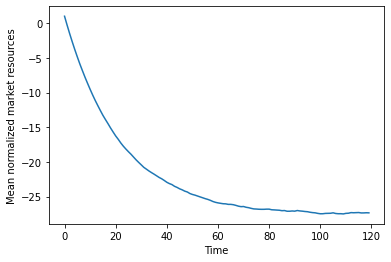

In [5]:
plt.plot(np.mean(PFexample.history["mNrm"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

## Using the Generic Monte Carlo Simulator

In [6]:
from HARK.distribution import Lognormal
import HARK.models.perfect_foresight as pf
from HARK.simulation.monte_carlo import AgentTypeMonteCarloSimulator

In [7]:
pf.model

{'shocks': {'live': <HARK.distribution.Bernoulli at 0x7f86ff5f3cd0>},
 'parameters': {'DiscFac': 0.96,
  'CRRA': (2.0,),
  'Rfree': 1.03,
  'LivPrb': 0.98,
  'PermGroFac': 1.01,
  'BoroCnstArt': None},
 'dynamics': {'y': <function HARK.models.perfect_foresight.<lambda>(p)>,
  'm': <function HARK.models.perfect_foresight.<lambda>(Rfree, a, y)>,
  'c': <HARK.model.Control at 0x7f86ff4d25f0>,
  'p': <function HARK.models.perfect_foresight.<lambda>(PermGroFac, p)>,
  'a': <function HARK.models.perfect_foresight.<lambda>(m, c)>},
 'reward': {'u': <function HARK.models.perfect_foresight.<lambda>(c)>}}

In [8]:
PFexample.solution[0].cFunc(10).tolist()

2.6790219804335322

In [9]:
## getting the decision rule from the original Perfect Foresight model
PFexample.solution[0].cFunc(10)

array(2.67902198)

In [10]:
pf_simulator = AgentTypeMonteCarloSimulator(
    pf.model['parameters'],
    pf.model['shocks'],
    pf.model['dynamics'],
    {
        'c' : lambda m: PFexample.solution[0].cFunc(m)
    },
    { # initial states
        'a' : Lognormal(-6, 1),
        'live' : 1,
        'p' : 1.0
    },
    agent_count = 10000,
    T_sim = 120
)



In [11]:
#pf_simulator.track_vars = ["mNrm"]
pf_simulator.initialize_sim()
pf_simulator.simulate(sim_periods=120)

{'live': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'y': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.01      , 1.01      , 1.01      , ..., 1.01      , 1.01      ,
         1.01      ],
        [1.0201    , 1.0201    , 1.0201    , ..., 1.0201    , 1.0201    ,
         1.0201    ],
        ...,
        [1.08285671, 1.34784892, 1.69446581, ..., 3.203323  , 2.10912847,
         3.203323  ],
        [1.09368527, 1.3613274 , 1.71141047, ..., 3.23535623, 2.13021975,
         3.23535623],
        [1.10462213, 1.37494068, 1.72852457, ..., 3.2677098 , 2.15152195,
         3.2677098 ]]),
 'm': array([[  1.00289517,   1.00223716,   1.00484398, ...,   1.00168362,
           1.00071965,   1.00716025],
        [ -0.30605416,  -0.3067019

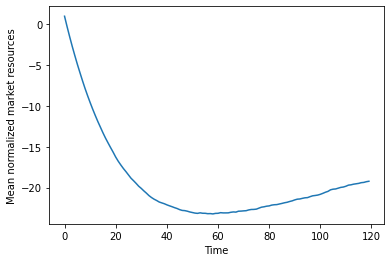

In [12]:
plt.plot(np.mean(pf_simulator.history['m'], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

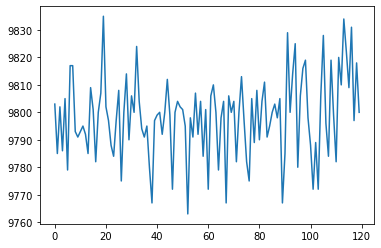

In [13]:
plt.plot(pf_simulator.history['live'].sum(axis=1))